In [1]:
import numpy as np

np.random.seed(0)
x = np.random.rand(100, 1)
y = 5 + 2 * x + np.random.rand(100, 1)

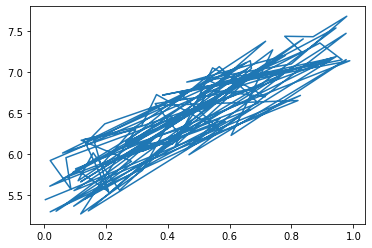

In [2]:
import matplotlib.pyplot as plt

plt.plot(x, y)
plt.show()

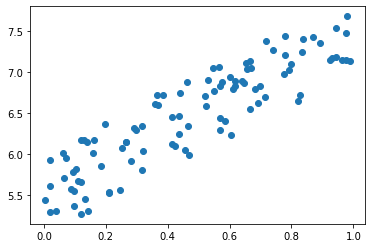

In [3]:
plt.scatter(x, y)
plt.show()

In [4]:
import sys
sys.path.append('..')
from dezero import *

x, y = Variable(x), Variable(y)

In [5]:
W = Variable(np.zeros((1, 1)))
b = Variable(np.zeros(1))

def predict(x):
    y = F.matmul(x, W) + b
    return y

In [6]:
def mean_squared_error(x0, x1):
    diff = x0 - x1
    return F.sum(diff ** 2) / len(diff)

In [7]:
lr = 0.1
iters = 100

for i in range(iters):
    y_pred = predict(x)
    loss = mean_squared_error(y, y_pred)
    
    W.cleargrad()
    b.cleargrad()
    loss.backward()
    
    W.data -= lr * W.grad.data
    b.data -= lr * b.grad.data
    
print(W, b, loss)

variable([[2.11807369]]) variable([5.46608905]) variable(0.07908606512411756)


In [8]:
x1 = np.arange(0, 1, .01)
y1 = (x1 * W.data + b.data).reshape(100)

In [9]:
x0 = np.random.rand(100, 1)
y0 = 5 + 2 * x0 + np.random.rand(100, 1)

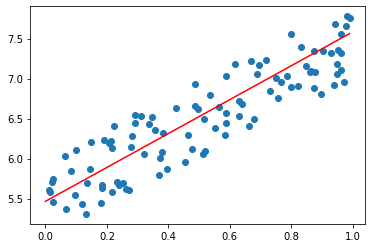

In [10]:
plt.scatter(x0, y0)
plt.plot(x1, y1, color='red')
plt.show()